In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
df=pd.read_csv("fireball.csv")

In [11]:
df.shape


(991, 10)

In [12]:
df.dtypes

Peak Brightness Date/Time (UT)          object
Latitude (deg.)                         object
Longitude (deg.)                        object
Altitude (km)                          float64
Velocity (km/s)                        float64
vx                                     float64
vy                                     float64
vz                                     float64
Total Radiated Energy (J)              float64
Calculated Total Impact Energy (kt)    float64
dtype: object

In [13]:
# To display the top 5 rows 
df.head(5) 


Peak Brightness Date/Time (UT) Latitude (deg.) Longitude (deg.)  \
0            2024-07-30 19:27:16            6.7S           124.4W   
1            2024-07-20 14:08:10           73.7S            22.5E   
2            2024-07-13 03:10:41            7.4S            41.0W   
3            2024-07-12 00:09:35            2.6N            46.6E   
4            2024-06-28 16:05:19           55.1N           140.6E   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0           39.0             14.6  -2.0  14.3  -2.2   
1           38.8             30.8  28.1  -6.5  10.9   
2           32.0              NaN   NaN   NaN   NaN   
3           41.5             22.4  -8.4  -1.8 -20.7   
4           29.2             15.3   0.6 -15.1  -2.2   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  
0               2.700000e+10                                0.095  
1               2.433000e+12                                5.100  
2               5.900000e+11                                1.500  
3               8.500000e+10                                0.260  
4               3.800000e+10                                0.130

In [14]:
df.tail(5)                        # To display the botton 5 rows

Peak Brightness Date/Time (UT) Latitude (deg.) Longitude (deg.)  \
986            1993-11-29 17:48:41           26.5N            78.3E   
987            1993-10-31 03:39:27           51.3N           100.9W   
988            1991-10-04 09:22:47           78.7N             6.3E   
989            1990-10-01 03:51:47            7.5N           142.8E   
990            1988-04-15 03:03:10            4.1S           124.3E   

     Altitude (km)  Velocity (km/s)  vx  vy  vz  Total Radiated Energy (J)  \
986            NaN              NaN NaN NaN NaN               2.600000e+10   
987            NaN              NaN NaN NaN NaN               4.000000e+10   
988            NaN              NaN NaN NaN NaN               5.500000e+11   
989            NaN              NaN NaN NaN NaN               2.500000e+12   
990            NaN              NaN NaN NaN NaN               7.580000e+12   

     Calculated Total Impact Energy (kt)  
986                                0.092  
987                                0.130  
988                                1.400  
989                                5.200  
990                               14.000

In [15]:
df.count()

Peak Brightness Date/Time (UT)         991
Latitude (deg.)                        801
Longitude (deg.)                       801
Altitude (km)                          532
Velocity (km/s)                        319
vx                                     319
vy                                     319
vz                                     319
Total Radiated Energy (J)              991
Calculated Total Impact Energy (kt)    991
dtype: int64

In [16]:
print(df.isnull().sum())

Peak Brightness Date/Time (UT)           0
Latitude (deg.)                        190
Longitude (deg.)                       190
Altitude (km)                          459
Velocity (km/s)                        672
vx                                     672
vy                                     672
vz                                     672
Total Radiated Energy (J)                0
Calculated Total Impact Energy (kt)      0
dtype: int64


In [17]:
df = df.dropna()    # Dropping the missing values.
df.count()

Peak Brightness Date/Time (UT)         316
Latitude (deg.)                        316
Longitude (deg.)                       316
Altitude (km)                          316
Velocity (km/s)                        316
vx                                     316
vy                                     316
vz                                     316
Total Radiated Energy (J)              316
Calculated Total Impact Energy (kt)    316
dtype: int64

In [18]:
print(df.describe())

       Altitude (km)  Velocity (km/s)          vx          vy          vz  \
count     316.000000       316.000000  316.000000  316.000000  316.000000   
mean       33.933228        18.515823   -0.034494   -1.821519   -0.896203   
std         8.352154         6.195575   11.597659   11.632324   10.593459   
min        14.000000         9.800000  -35.400000  -43.500000  -32.100000   
25%        28.475000        14.375000   -8.650000  -10.425000   -9.025000   
50%        33.300000        17.050000    0.150000   -2.400000   -0.100000   
75%        38.225000        20.825000    8.625000    5.900000    7.125000   
max        74.300000        49.000000   28.100000   31.200000   27.000000   

       Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  
count               3.160000e+02                           316.000000  
mean                1.846326e+12                             2.708541  
std                 2.122241e+13                            25.061534  
min               

In [19]:
print(df.isnull().sum()) 

Peak Brightness Date/Time (UT)         0
Latitude (deg.)                        0
Longitude (deg.)                       0
Altitude (km)                          0
Velocity (km/s)                        0
vx                                     0
vy                                     0
vz                                     0
Total Radiated Energy (J)              0
Calculated Total Impact Energy (kt)    0
dtype: int64


In [20]:
def convert_latitude(value):
    if 'N' in value:
        return float(value.replace('N', ''))
    elif 'S' in value:
        return -float(value.replace('S', ''))

def convert_longitude(value):
    if 'E' in value:
        return float(value.replace('E', ''))
    elif 'W' in value:
        return -float(value.replace('W', ''))

df['Latitude (deg.)'] = df['Latitude (deg.)'].apply(convert_latitude)
df['Longitude (deg.)'] = df['Longitude (deg.)'].apply(convert_longitude)


In [21]:
df.head()

Peak Brightness Date/Time (UT)  Latitude (deg.)  Longitude (deg.)  \
0            2024-07-30 19:27:16             -6.7            -124.4   
1            2024-07-20 14:08:10            -73.7              22.5   
3            2024-07-12 00:09:35              2.6              46.6   
4            2024-06-28 16:05:19             55.1             140.6   
5            2024-06-18 21:01:32             32.2             -31.8   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0           39.0             14.6  -2.0  14.3  -2.2   
1           38.8             30.8  28.1  -6.5  10.9   
3           41.5             22.4  -8.4  -1.8 -20.7   
4           29.2             15.3   0.6 -15.1  -2.2   
5           28.7             16.2   1.8  14.7  -6.6   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  
0               2.700000e+10                                0.095  
1               2.433000e+12                                5.100  
3               8.500000e+10                                0.260  
4               3.800000e+10                                0.130  
5               2.200000e+10                                0.079

In [22]:
numeric_columns = list(df.select_dtypes('number'))
numeric_columns

['Latitude (deg.)',
 'Longitude (deg.)',
 'Altitude (km)',
 'Velocity (km/s)',
 'vx',
 'vy',
 'vz',
 'Total Radiated Energy (J)',
 'Calculated Total Impact Energy (kt)']

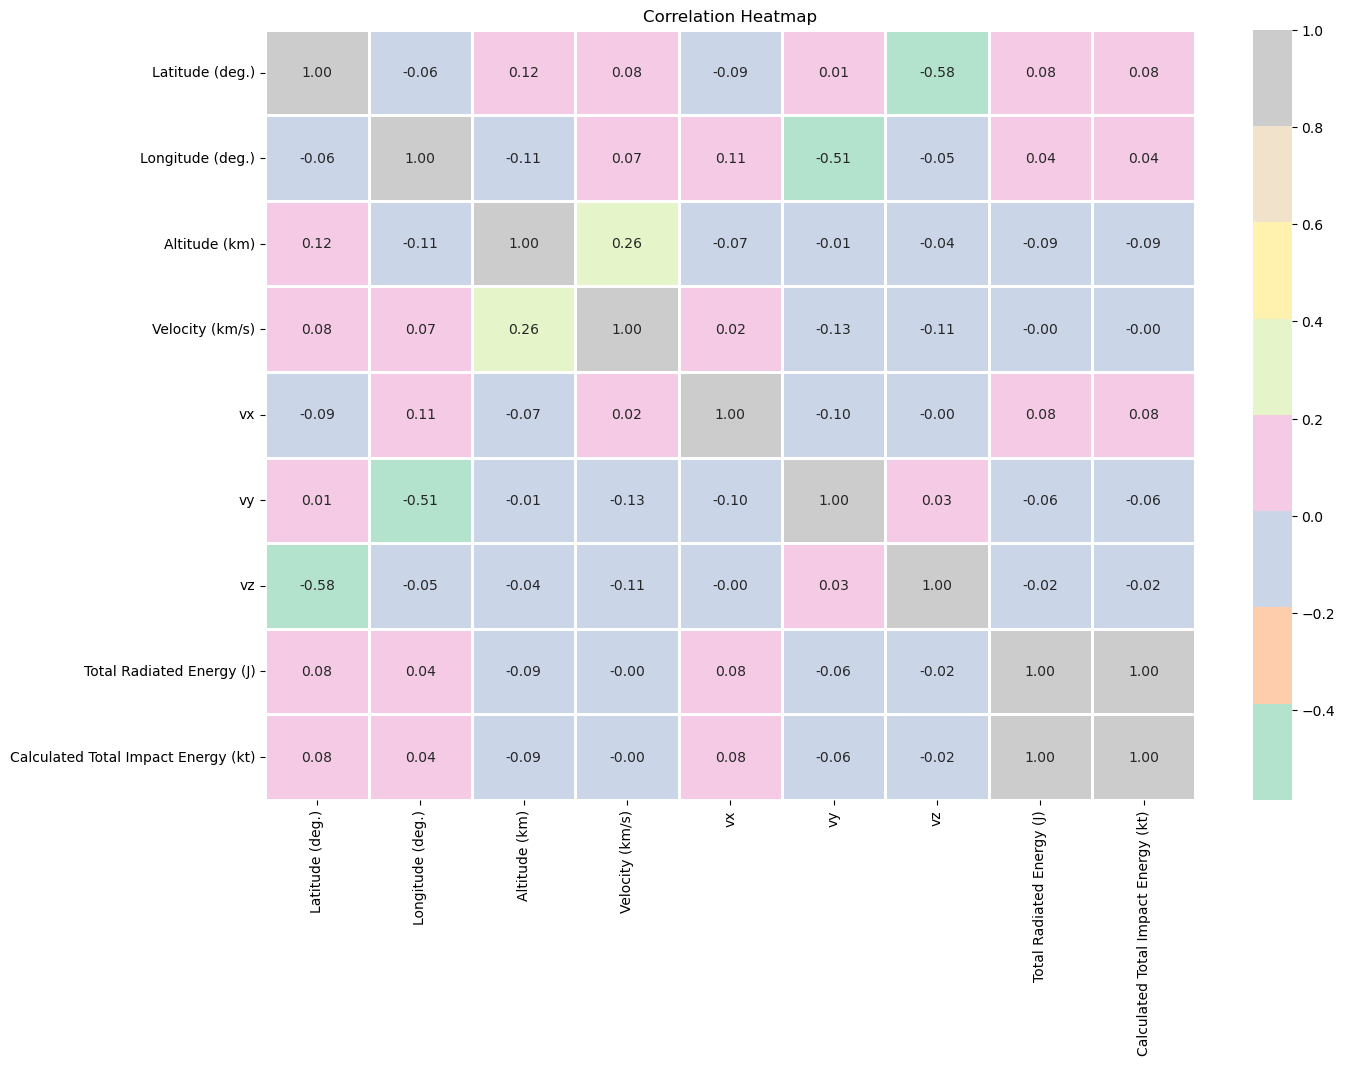

In [23]:
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

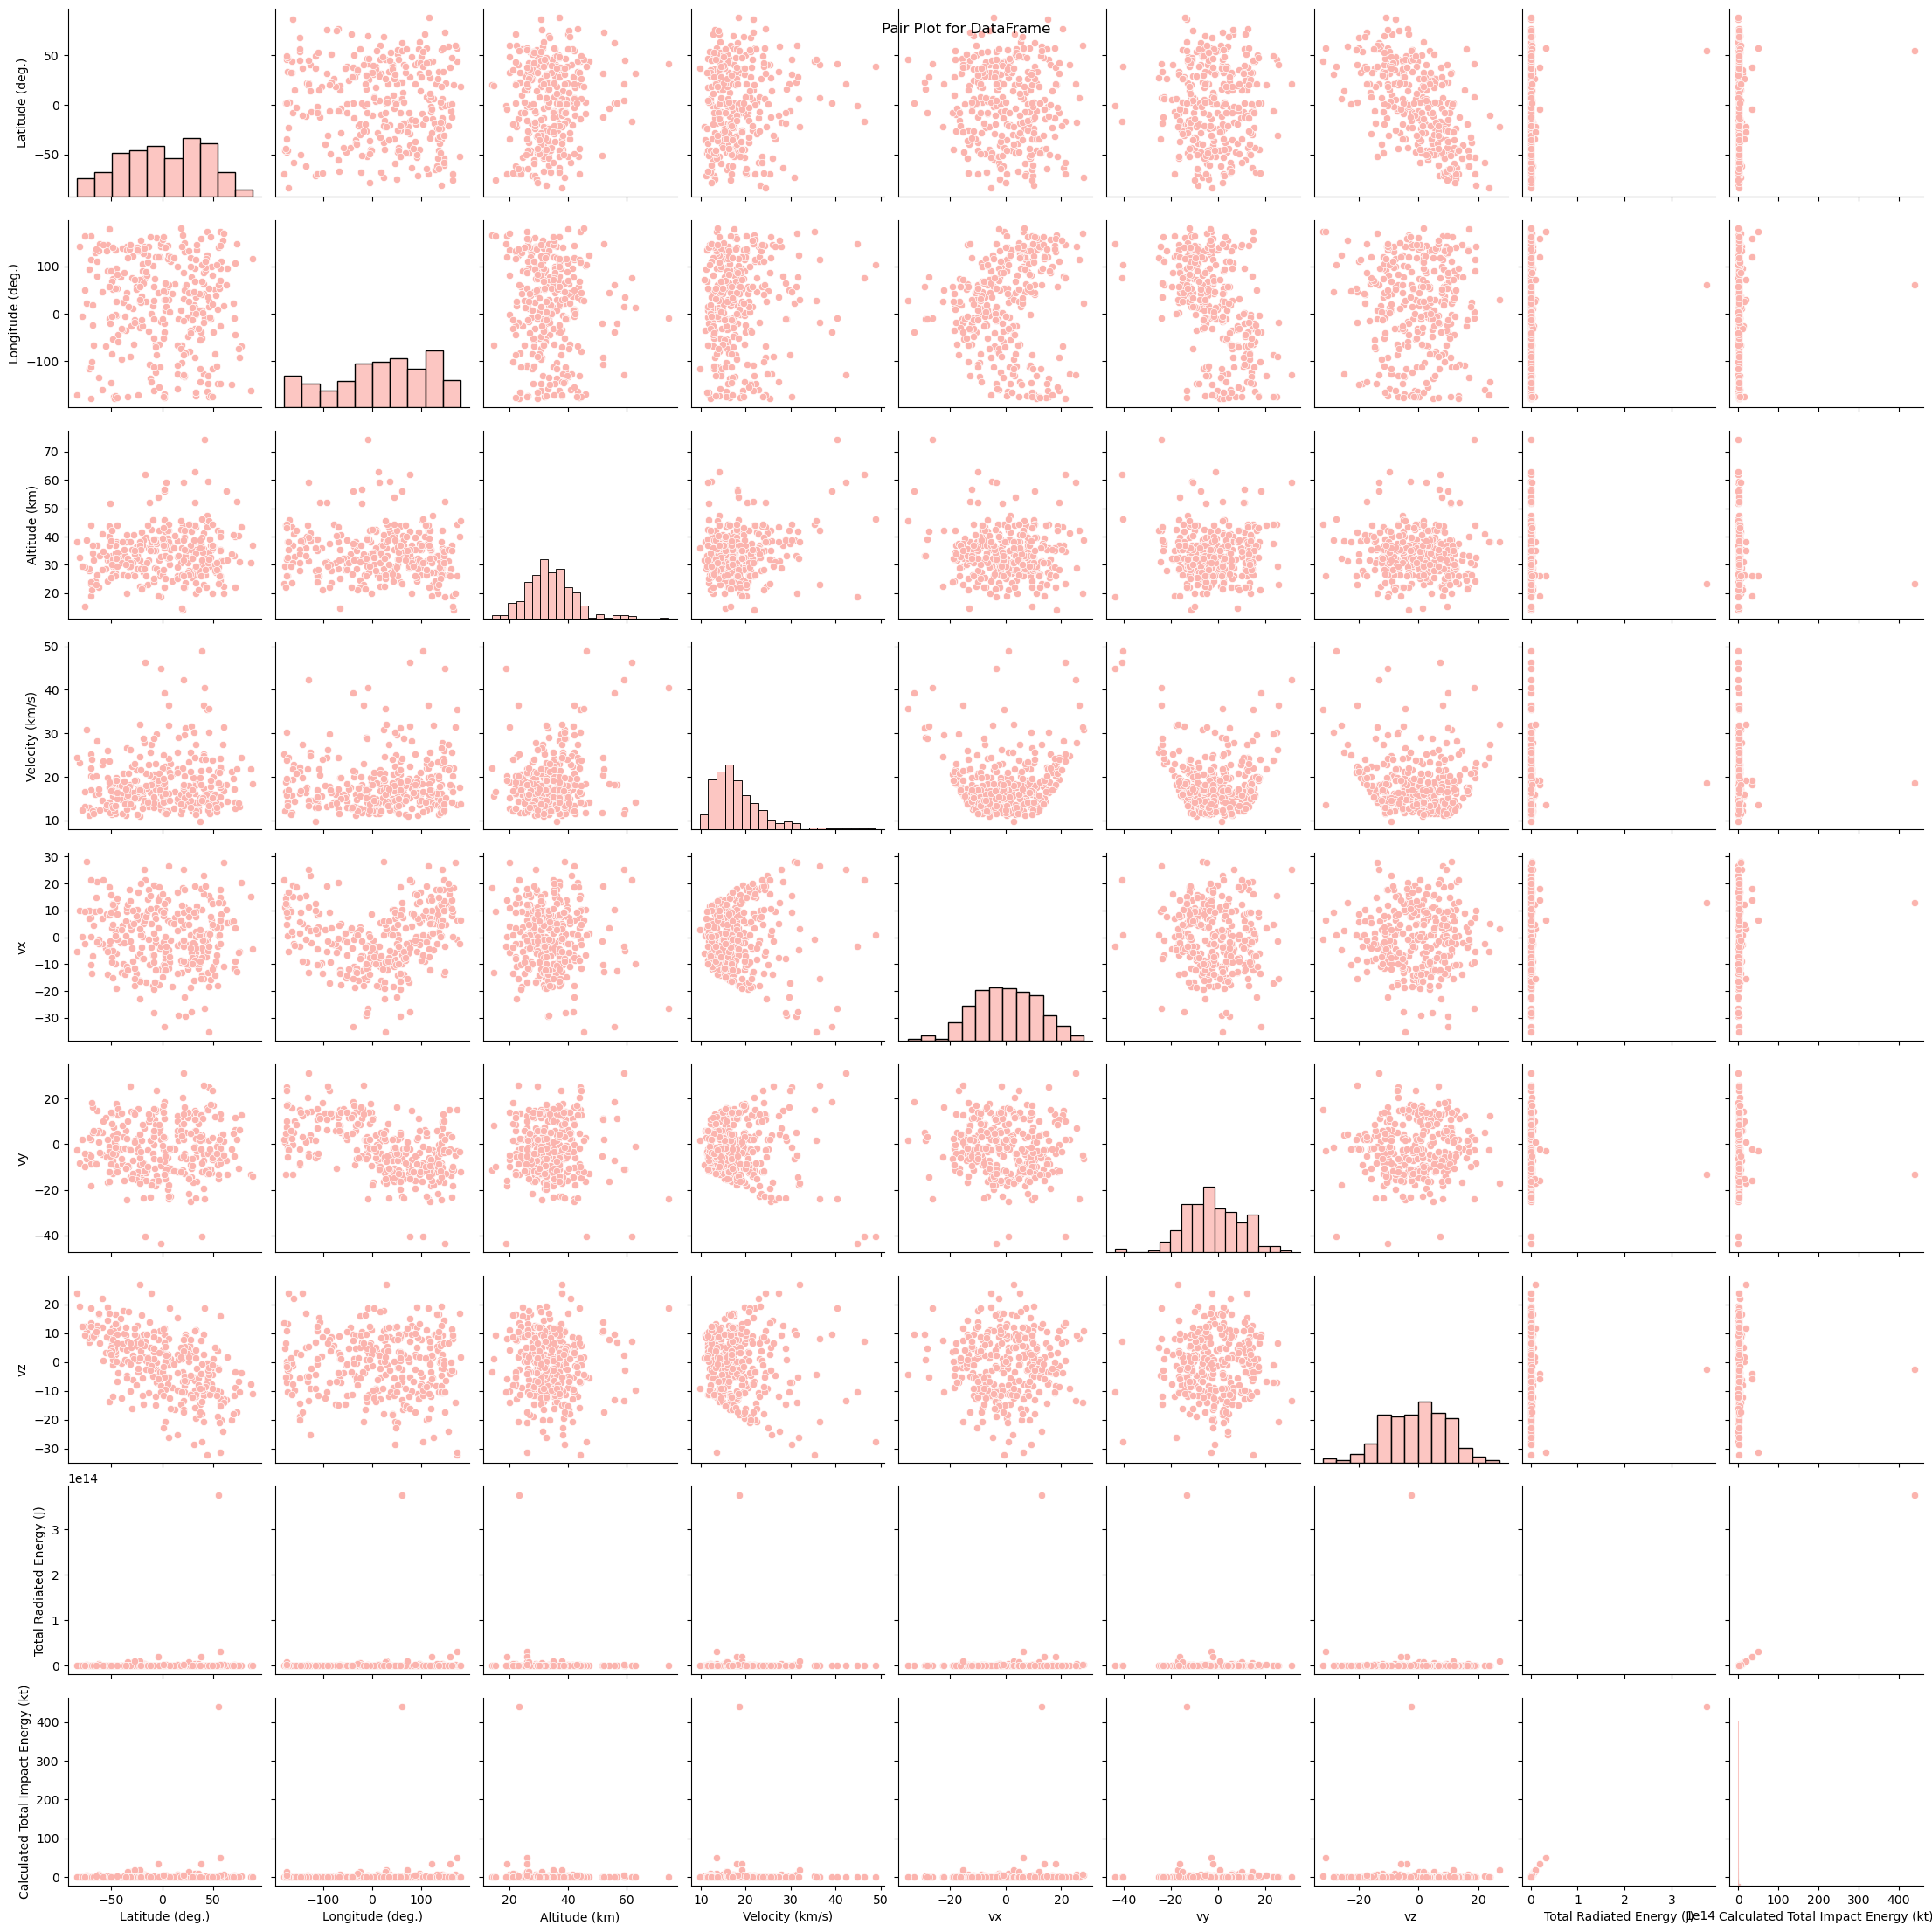

In [24]:
# Set the color palette
#custom_palette = sns.color_palette(["#000000"])
#sns.set_palette(custom_palette)
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

In [25]:
import plotly.express as px

px.scatter_mapbox(df, lat = 'Latitude (deg.)', lon = 'Longitude (deg.)',
                 mapbox_style = 'open-street-map',
                  center = {'lat':0, 'lon':5},
                 zoom = 0.3, 
                 title = 'Map of All Detected FireBall Impacts',
                 ).update_layout(title = {'x':0.45}, width = 800, height =750, geo_bgcolor = 'lightblue')
                                 

In [27]:
px.density_mapbox(df,lat = 'Latitude (deg.)', lon = 'Longitude (deg.)',
                   mapbox_style = 'open-street-map',
                  center = {'lat':0, 'lon':5},
                 zoom = 0.5, z = 'Calculated Total Impact Energy (kt)',
                 #title = 'Map of Major Detected FireBall Impacts <br> Feature size relates to number of Impacts and Impact Energy',
                  #color_continuous_scale='viridis'
                 #).update_layout(title = {'x':0.45}, width = 1000, height =850)
                  title = 'Map of All Detected FireBall Impacts',
                 ).update_layout(title = {'x':0.45}, width = 800, height =750, geo_bgcolor = 'lightblue')

In [28]:
conversion_factor = 4.185 * 10**12

# Create a new column for the energy in kilotons, dividing by the conversion factor and rounding to 3 decimal places
df['Total_Radiated_Energy_kt'] = (df['Total Radiated Energy (J)'] / conversion_factor).round(3)
df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df['Peak Brightness Date/Time (UT)'])
df['Year'] = df['Peak Brightness Date/Time (UT)'].dt.year
df['Month'] = df['Peak Brightness Date/Time (UT)'].dt.month

In [43]:
print(df.head());

  Peak Brightness Date/Time (UT)  Latitude (deg.)  Longitude (deg.)  \
0            2024-07-30 19:27:16             -6.7            -124.4   
1            2024-07-20 14:08:10            -73.7              22.5   
3            2024-07-12 00:09:35              2.6              46.6   
4            2024-06-28 16:05:19             55.1             140.6   
5            2024-06-18 21:01:32             32.2             -31.8   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0           39.0             14.6  -2.0  14.3  -2.2   
1           38.8             30.8  28.1  -6.5  10.9   
3           41.5             22.4  -8.4  -1.8 -20.7   
4           29.2             15.3   0.6 -15.1  -2.2   
5           28.7             16.2   1.8  14.7  -6.6   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  \
0               2.700000e+10                                0.095   
1               2.433000e+12                                5.100   
3               8.500000e+10       

In [45]:
import pandas as pd
from tabulate import tabulate

# Define the data
data = [
    [1.0, 0.35],
    [1.0, 0.40],
    [0.9, 0.40],
    [0.9, 0.50],
    [0.7, 0.50],
    [0.4, 0.50]
]

# Create the DataFrame
Altitude_Efficiency_Radiation_Table = pd.DataFrame(
    data, 
    columns=["Blast Efficiency Factor", "Thermal Radiation (%)"],
    index=[
        "Altitude(km) <= 12.192", 
        "12.192 < Alt(km) <= 27.432", 
        "27.432 < Alt(km) <= 30.480", 
        "30.480 < Alt(km) <= 36.576", 
        "36.576 < Alt(km) <= 45.720", 
        "Altitude(km) > 45.720"
    ]
)

# Display the table nicely with tabulate
print(tabulate(Altitude_Efficiency_Radiation_Table, headers='keys', tablefmt='pretty'))

+----------------------------+-------------------------+-----------------------+
|                            | Blast Efficiency Factor | Thermal Radiation (%) |
+----------------------------+-------------------------+-----------------------+
|   Altitude(km) <= 12.192   |           1.0           |         0.35          |
| 12.192 < Alt(km) <= 27.432 |           1.0           |          0.4          |
| 27.432 < Alt(km) <= 30.480 |           0.9           |          0.4          |
| 30.480 < Alt(km) <= 36.576 |           0.9           |          0.5          |
| 36.576 < Alt(km) <= 45.720 |           0.7           |          0.5          |
|   Altitude(km) > 45.720    |           0.4           |          0.5          |
+----------------------------+-------------------------+-----------------------+


In [46]:
# Define the conversion factor
factor = 110 * 0.3048

# Create conditions and corresponding values for each altitude range
conditions = [
    (df['Altitude (km)'] <= 12.192),
    (df['Altitude (km)'] > 12.192) & (df['Altitude (km)'] <= 27.432),
    (df['Altitude (km)'] > 27.432) & (df['Altitude (km)'] <= 30.48),
    (df['Altitude (km)'] > 30.48) & (df['Altitude (km)'] <= 36.576),
    (df['Altitude (km)'] > 36.576) & (df['Altitude (km)'] <= 45.72),
    (df['Altitude (km)'] > 45.72)
]

# Corresponding calculations for each condition
values = [
    factor * (df['Total_Radiated_Energy_kt'] / (0.35 * 1))**0.4,
    factor * (df['Total_Radiated_Energy_kt'] / (0.40 * 1))**0.4,
    factor * (df['Total_Radiated_Energy_kt'] / (0.4 * 0.9))**0.4,
    factor * (df['Total_Radiated_Energy_kt'] / (0.5 * 0.9))**0.4,
    factor * (df['Total_Radiated_Energy_kt'] / (0.5 * 0.7))**0.4,
    factor * (df['Total_Radiated_Energy_kt'] / (0.5 * 0.4))**0.4
]

# Calculate 'Air_Burst_Rad_m' based on conditions, rounding to 2 decimal places
df['Air_Burst_Rad_m'] = np.select(conditions, values).round(2)
print(df.head());

  Peak Brightness Date/Time (UT)  Latitude (deg.)  Longitude (deg.)  \
0            2024-07-30 19:27:16             -6.7            -124.4   
1            2024-07-20 14:08:10            -73.7              22.5   
3            2024-07-12 00:09:35              2.6              46.6   
4            2024-06-28 16:05:19             55.1             140.6   
5            2024-06-18 21:01:32             32.2             -31.8   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0           39.0             14.6  -2.0  14.3  -2.2   
1           38.8             30.8  28.1  -6.5  10.9   
3           41.5             22.4  -8.4  -1.8 -20.7   
4           29.2             15.3   0.6 -15.1  -2.2   
5           28.7             16.2   1.8  14.7  -6.6   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  \
0               2.700000e+10                                0.095   
1               2.433000e+12                                5.100   
3               8.500000e+10       

In [47]:
#NumCluEng = df[['Total_Radiated_Energy_kt', 'Calculated Total Impact Energy (kt)']]
NumCluEng = df[['Total_Radiated_Energy_kt', 'Air_Burst_Rad_m']]

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

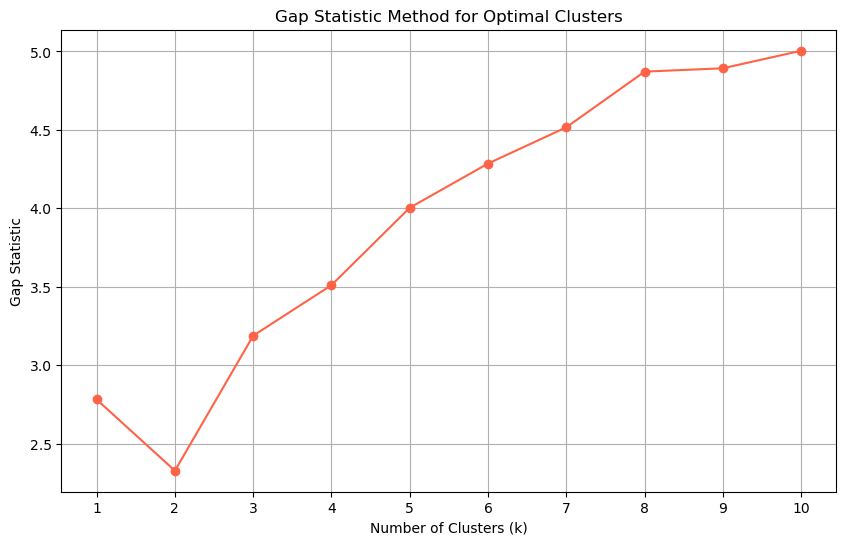

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# NumCluEng is your DataFrame
# Define the range of clusters to test
k_values = range(1, 11)

# Function to calculate the Gap Statistic
def gap_statistic(data, k_values, n_refs=10):
    # Initialize an empty list to hold the gap values
    gaps = []
    for k in k_values:
        # Fit the KMeans model
        kmeans = KMeans(n_clusters=k, random_state=999)
        kmeans.fit(data)
        
        # Inertia (Within-cluster sum of squares)
        inertia = kmeans.inertia_
        
        # Generate reference datasets
        ref_inertias = []
        for _ in range(n_refs):
            random_data = np.random.uniform(low=data.min(), high=data.max(), size=data.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=999)
            kmeans_ref.fit(random_data)
            ref_inertias.append(kmeans_ref.inertia_)
        
        # Calculate the gap statistic
        gap = np.log(np.mean(ref_inertias)) - np.log(inertia)
        gaps.append(gap)
    
    return gaps

# Calculate the Gap Statistic for the specified range of clusters
gaps = gap_statistic(NumCluEng, k_values)
# Plot the Gap Statistic
plt.figure(figsize=(10, 6))
plt.plot(k_values, gaps, marker='o', color='tomato')
plt.title('Gap Statistic Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.xticks(k_values)
#plt.axhline(0, linestyle='--', color='grey', lw=1)
plt.grid()
plt.show()

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming Bolide_img is your DataFrame with the relevant columns

# Set the seed for reproducibility
np.random.seed(333)

# Select the relevant columns for preprocessing
features = df[['Total_Radiated_Energy_kt', 'Calculated Total Impact Energy (kt)']]  # Replace 'Column_10' and 'Column_11' with actual column names

# Scale the features
scaler = StandardScaler()
B_mod_erg_norm = scaler.fit_transform(features)

# Apply k-means clustering with 5 centers
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=333)
B_erg_KMC = kmeans.fit_predict(B_mod_erg_norm)

# Assign clusters back to the original DataFrame
df['Cluster_erg'] = B_erg_KMC

# Create subsets for each cluster
B_erg1 = df[df['Cluster_erg'] == 0].copy()
B_erg2 = df [df['Cluster_erg'] == 1].copy()


# Display the summary for 'Calculated_Total_Impact_Energy_kt' for the first cluster
summary_B_erg1 = B_erg1['Calculated Total Impact Energy (kt)'].describe() 
# Replace 'Calculated_Total_Impact_Energy_kt' with the actual column name

print(summary_B_erg1)

count    299.000000
mean       0.548157
std        0.859695
min        0.073000
25%        0.130000
50%        0.230000
75%        0.520000
max        5.100000
Name: Calculated Total Impact Energy (kt), dtype: float64


C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [58]:
 #B_erg1 and B_erg2 are your DataFrames

# Step 1: Add a new column to B_erg1
B_erg1['Energy_Grp'] = "Impact-Nrg Clus 1"

# Step 2: Get summary statistics for the Calculated_Total_Impact_Energy_kt column in B_erg2
summary_B_erg2 = B_erg2['Calculated Total Impact Energy (kt)'].describe()  # Replace with the actual column name

# Display the summary statistics
print(summary_B_erg2)

count      1.0
mean     440.0
std        NaN
min      440.0
25%      440.0
50%      440.0
75%      440.0
max      440.0
Name: Calculated Total Impact Energy (kt), dtype: float64


In [60]:
# B_erg1, B_erg2, B_erg3, B_erg4, and B_erg5 are your DataFrames

# Step 1: Combine the DataFrames into one
Bolide_erg_grp = pd.concat([B_erg1, B_erg2], ignore_index=True)

# Step 2: Convert the 'Energy_Grp' column to a categorical type
Bolide_erg_grp['Energy_Grp'] = Bolide_erg_grp['Energy_Grp'].astype('category')

# Optionally, print the resulting DataFrame to verify
print(Bolide_erg_grp.head())

  Peak Brightness Date/Time (UT)  Latitude (deg.)  Longitude (deg.)  \
0            2024-07-30 19:27:16             -6.7            -124.4   
1            2024-07-20 14:08:10            -73.7              22.5   
2            2024-07-12 00:09:35              2.6              46.6   
3            2024-06-28 16:05:19             55.1             140.6   
4            2024-06-18 21:01:32             32.2             -31.8   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0           39.0             14.6  -2.0  14.3  -2.2   
1           38.8             30.8  28.1  -6.5  10.9   
2           41.5             22.4  -8.4  -1.8 -20.7   
3           29.2             15.3   0.6 -15.1  -2.2   
4           28.7             16.2   1.8  14.7  -6.6   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  \
0               2.700000e+10                                0.095   
1               2.433000e+12                                5.100   
2               8.500000e+10       

In [62]:
# Select the 'Altitude_km' and 'Velocity_km_s' columns, and drop rows with NaN values
NumCluAV = df[['Altitude (km)', 'Velocity (km/s)']].dropna()

In [64]:
!pip install yellowbrick

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

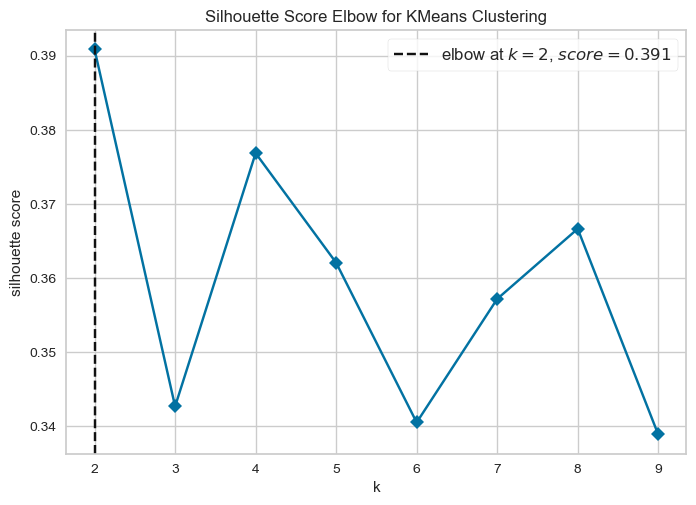

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Assuming NumCluAV is your DataFrame with the relevant columns
# Initialize the KMeans model
model = KMeans()

# Use Yellowbrick's KElbowVisualizer to find the optimal number of clusters with silhouette method
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)

# Fit the visualizer on your data
visualizer.fit(NumCluAV)  
visualizer.show()

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Bolide_erg_grp is your DataFrame
# Step 1: Filter out rows with NA values in Altitude and Velocity
Bolide_CC = df.dropna(subset=['Altitude (km)', 'Velocity (km/s)']) 


# Step 2: Set the random seed for reproducibility
np.random.seed(999)

# Step 3: Select features for clustering
features = Bolide_CC[['Altitude (km)', 'Velocity (km/s)']]  # Replace with actual column names

# Step 4: Normalize the data
scaler = StandardScaler()
B_mod_AV_norm = scaler.fit_transform(features)

# Step 5: Apply k-means clustering with 3 centers
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=999)
B_AV_KMC = kmeans.fit_predict(B_mod_AV_norm)

# Step 6: Add cluster labels to the original DataFrame
Bolide_CC['Cluster_AV'] = B_AV_KMC

# Step 7: Create separate DataFrames for each cluster
B_AV1 = Bolide_CC[Bolide_CC['Cluster_AV'] == 0].copy()
B_AV2 = Bolide_CC[Bolide_CC['Cluster_AV'] == 1].copy()
B_AV3 = Bolide_CC[Bolide_CC['Cluster_AV'] == 2].copy()

# Step 8: Add the Cluster label to each DataFrame
B_AV1['Cluster_AV'] = "Alt-Velocity Cl 1"
B_AV2['Cluster_AV'] = "Alt-Velocity Cl 2"
B_AV3['Cluster_AV'] = "Alt-Velocity Cl 3"

# Step 9: Combine all clusters into one DataFrame
Bolide_C_Case = pd.concat([B_AV1, B_AV2, B_AV3], ignore_index=True)

# Step 10: Convert the Cluster_AV column to a categorical type
Bolide_C_Case['Cluster_AV'] = Bolide_C_Case['Cluster_AV'].astype('category')

# Optionally, display the resulting DataFrame
print(Bolide_C_Case.head())


  Peak Brightness Date/Time (UT)  Latitude (deg.)  Longitude (deg.)  \
0            2024-07-30 19:27:16             -6.7            -124.4   
1            2024-07-12 00:09:35              2.6              46.6   
2            2024-05-05 20:11:03             -7.1            -112.7   
3            2023-11-21 22:17:29             -9.4              17.4   
4            2023-10-16 17:14:52             -6.5             -65.4   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0           39.0             14.6  -2.0  14.3  -2.2   
1           41.5             22.4  -8.4  -1.8 -20.7   
2           39.0             13.9   8.4  11.0  -0.7   
3           37.0             18.3 -17.9  -3.9   0.1   
4           35.3             19.8 -12.2  14.9  -4.8   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  \
0               2.700000e+10                                0.095   
1               8.500000e+10                                0.260   
2               3.700000e+10       

C:\Users\shakh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [80]:
# Assuming Bolide_C_Case is your DataFrame

# Summary for Energy.Grp
#energy_grp_summary = Bolide_C_Case['Energy_Grp'].value_counts()  # Replace 'Energy_Grp' with the actual column name
#print("Summary of Energy.Grp:")
#print(energy_grp_summary)

# Summary for Cluster.AV
cluster_av_summary = Bolide_C_Case['Cluster_AV'].value_counts()  
print("\nSummary of Cluster.AV:")
print(cluster_av_summary)



Summary of Cluster.AV:
Cluster_AV
Alt-Velocity Cl 2    162
Alt-Velocity Cl 1    115
Alt-Velocity Cl 3     39
Name: count, dtype: int64


KeyError: 'Energy_Grp'

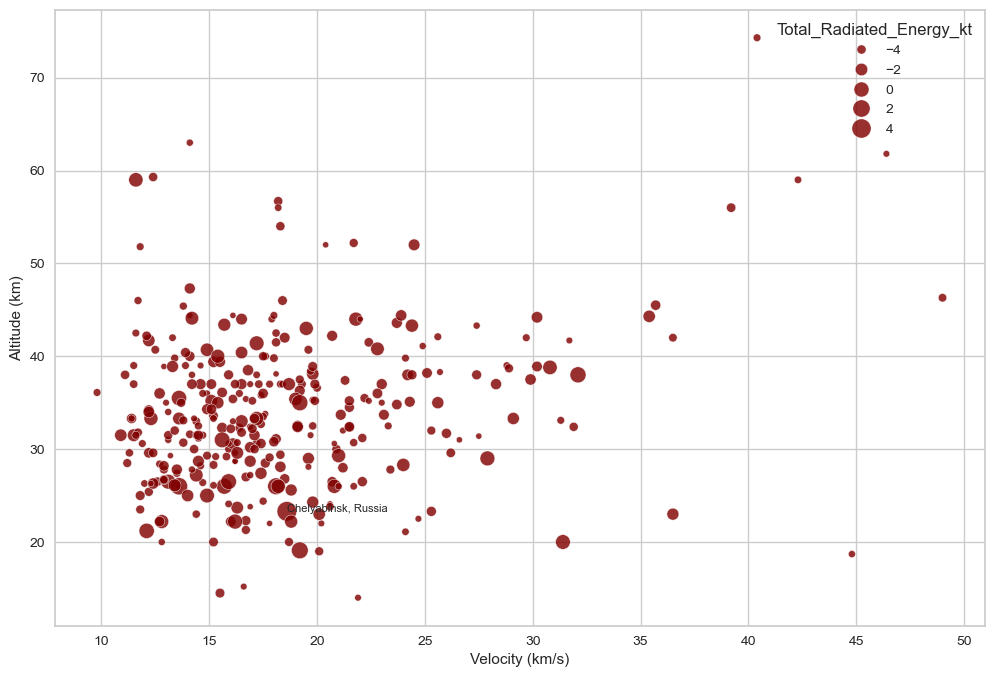

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Bolide_C_Case is your DataFrame
plt.figure(figsize=(12, 8))

# Scatter plot with jitter-like effect using scatterplot and 'alpha' for transparency
scatter = sns.scatterplot(data=Bolide_C_Case, 
                           x='Velocity (km/s)', 
                           y='Altitude (km)', 
                           size=np.log(Bolide_C_Case['Total_Radiated_Energy_kt']), 
                           sizes=(20, 200), 
                           color='maroon', 
                           edgecolor='white', 
                           alpha=0.81, 
                           marker='o')

# Adding text labels for specific events (e.g., Chelyabinsk, Russia)
for i in range(len(Bolide_C_Case)):
    if Bolide_C_Case['Total_Radiated_Energy_kt'].iloc[i] > 80:  # Replace with the actual column name
        plt.text(Bolide_C_Case['Velocity (km/s)'].iloc[i], 
                 Bolide_C_Case['Altitude (km)'].iloc[i], 
                 "Chelyabinsk, Russia", 
                 horizontalalignment='left', size=8)

# Faceting by Cluster_AV and Energy_Grp (similar to facet_grid in ggplot)
g = sns.FacetGrid(Bolide_C_Case, col='Energy_Grp', row='Cluster_AV', margin_titles=True, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.scatterplot, x='Velocity (km/s)', y='Altitude (km)', size=np.log(Bolide_C_Case['Total_Radiated_Energy_kt']), 
                sizes=(20, 200), color='maroon', edgecolor='white', alpha=0.81)

# Customize the titles and axis labels
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.set_axis_labels("Velocity (km/s)", "Altitude (km), above geoid")
g.fig.suptitle("Bolides on 'Energy x Altitude-Velocity' clusters", fontsize=16)
g.fig.subplots_adjust(top=0.90)

# Adjust the legend for size (log of energy)
g.add_legend(title="Log of Calculated total energy (kt)")

# Show the plot
plt.show()

In [84]:
import pandas as pd

# Assuming Bolide_C_Case is your DataFrame with 'Latitude (deg.)' and 'Longitude (deg.)' columns

# Define function for latitude hemisphere
def get_latitude_hemisphere(lat):
    if lat >= 0:
        return 'N'  # Northern Hemisphere
    else:
        return 'S'  # Southern Hemisphere

# Define function for longitude hemisphere
def get_longitude_hemisphere(lon):
    if lon >= 0:
        return 'E'  # Eastern Hemisphere
    else:
        return 'W'  # Western Hemisphere

# Apply functions to create new columns
Bolide_C_Case['Latitude_Hemisphere'] = Bolide_C_Case['Latitude (deg.)'].apply(get_latitude_hemisphere)
Bolide_C_Case['Longitude_Hemisphere'] = Bolide_C_Case['Longitude (deg.)'].apply(get_longitude_hemisphere)

# Now, Bolide_C_Case has two new columns with hemisphere info
print(Bolide_C_Case[['Latitude (deg.)', 'Latitude_Hemisphere', 'Longitude (deg.)', 'Longitude_Hemisphere']])

     Latitude (deg.) Latitude_Hemisphere  Longitude (deg.)  \
0               -6.7                   S            -124.4   
1                2.6                   N              46.6   
2               -7.1                   S            -112.7   
3               -9.4                   S              17.4   
4               -6.5                   S             -65.4   
..               ...                 ...               ...   
311            -22.0                   S              29.2   
312            -83.7                   S            -171.2   
313             31.1                   N              45.6   
314            -31.0                   S             -90.3   
315            -12.0                   S             162.8   

    Longitude_Hemisphere  
0                      W  
1                      E  
2                      W  
3                      E  
4                      W  
..                   ...  
311                    E  
312                    W  
313         

In [86]:
import pandas as pd

# Define function for latitude hemisphere
def get_latitude_hemisphere(lat):
    if lat >= 0:
        return 'N'  # Northern Hemisphere
    else:
        return 'S'  # Southern Hemisphere

# Define function for longitude hemisphere
def get_longitude_hemisphere(lon):
    if lon >= 0:
        return 'E'  # Eastern Hemisphere
    else:
        return 'W'  # Western Hemisphere

# Apply functions to create new columns for latitude and longitude hemispheres
Bolide_C_Case['Latitude_Hemisphere'] = Bolide_C_Case['Latitude (deg.)'].apply(get_latitude_hemisphere)
Bolide_C_Case['Longitude_Hemisphere'] = Bolide_C_Case['Longitude (deg.)'].apply(get_longitude_hemisphere)

# Combine latitude and longitude hemispheres into an NSEW column
Bolide_C_Case['NSEW'] = Bolide_C_Case['Latitude_Hemisphere'] + Bolide_C_Case['Longitude_Hemisphere']

# Now, Bolide_C_Case has an 'NSEW' column
print(Bolide_C_Case[['Latitude (deg.)', 'Longitude (deg.)', 'NSEW']])


     Latitude (deg.)  Longitude (deg.) NSEW
0               -6.7            -124.4   SW
1                2.6              46.6   NE
2               -7.1            -112.7   SW
3               -9.4              17.4   SE
4               -6.5             -65.4   SW
..               ...               ...  ...
311            -22.0              29.2   SE
312            -83.7            -171.2   SW
313             31.1              45.6   NE
314            -31.0             -90.3   SW
315            -12.0             162.8   SE

[316 rows x 3 columns]


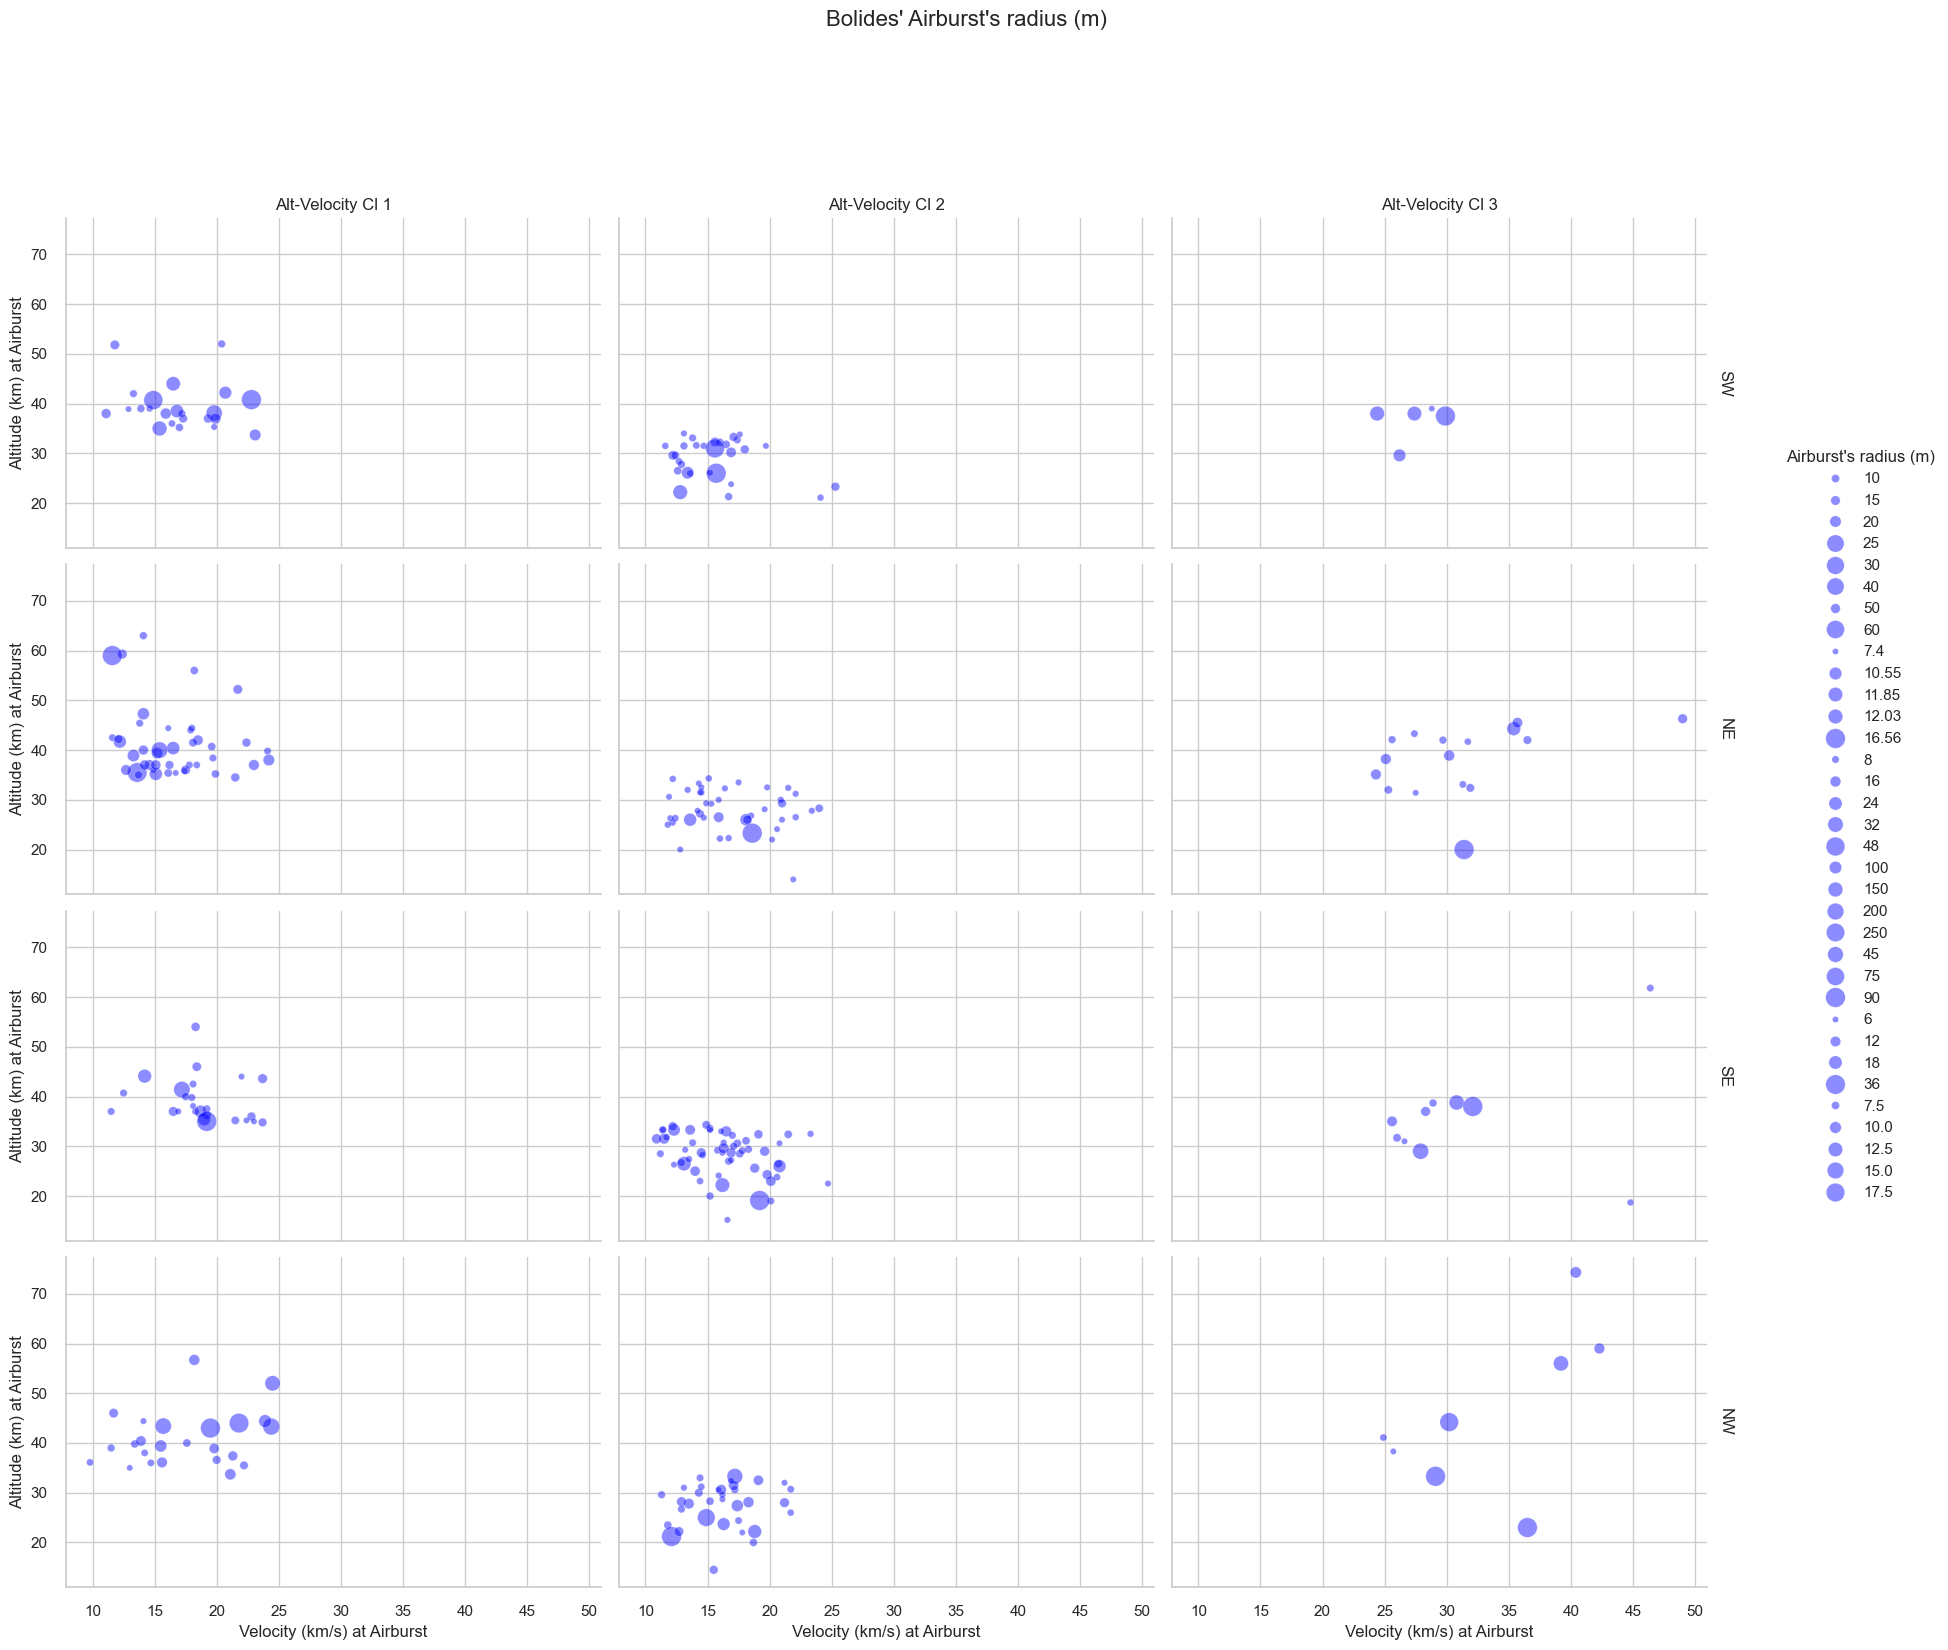

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming Bolide_C_Case is your DataFrame
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Use a theme similar to theme_light()

# Scatter plot
scatter = sns.scatterplot(data=Bolide_C_Case, 
                          x='Velocity (km/s)', 
                          y='Altitude (km)', 
                          size='Air_Burst_Rad_m', 
                          sizes=(20, 200), 
                          color='blue', 
                          alpha=0.45)

# Adding text labels for Chelyabinsk, Russia
for i in range(len(Bolide_C_Case)):
    if Bolide_C_Case['Total_Radiated_Energy_kt'].iloc[i] > 80:
        plt.text(Bolide_C_Case['Velocity (km/s)'].iloc[i], 
                 Bolide_C_Case['Altitude (km)'].iloc[i], 
                 "Chelyabinsk, Russia", 
                 horizontalalignment='left', 
                 size=8)

# Use the new NSEW column for faceting
g = sns.FacetGrid(Bolide_C_Case, col='Cluster_AV', row='NSEW', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='Velocity (km/s)', y='Altitude (km)', 
                size='Air_Burst_Rad_m', sizes=(20, 200), color='blue', alpha=0.45)

# Customize the titles and axis labels
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.set_axis_labels("Velocity (km/s) at Airburst", "Altitude (km) at Airburst")
g.fig.suptitle("Bolides' Airburst's radius (m)", fontsize=16, y=1.03)
g.fig.subplots_adjust(top=0.9)

# Customize the legend for size
g.add_legend(title="Airburst's radius (m)")

# Show the plot
plt.show()